# Lab 2 - Classification

## Names:
David Samuel
James Hancock
Alexandra Fisher
Remy Lagrois

This notebook will explore 6 different models to classify the MNIST Handwritten.

# Data Description

In [15]:
%matplotlib inline 

In [16]:
 # controls matplotlib within Jupyter

import pandas as pd                    # import pandas lib

print("Importing...")
# create data frame of training and testing sets
dataset = pd.read_csv("data/train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
print("Done!...")

Importing...
Done!...


## Check the frequency of the training class labels

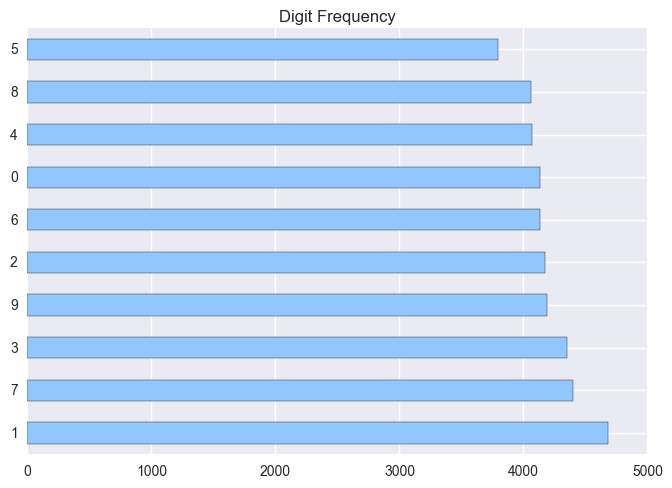

In [17]:
# seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
import matplotlib.pyplot as plt
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

sns.set(style='darkgrid', palette='pastel')
c = pd.Series(target)
c = c.value_counts()
sns = c.plot(title="Digit Frequency", kind='barh')  # set seaborn object equal to pandas plot object and it will plot automatically
plt.show()


# Data Preparation
### Split data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("Importing...")
# create data frame of training and testing sets
trains = pd.read_csv("data/train.csv")
y = trains[[0]].values.ravel()
X = trains.iloc[:,1:].values

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set

def splitter(train, test):
    sns.color_palette("Blues")
    sns.color_palette("husl", 8)
    sns.set_style("whitegrid", {'axes.grid' : False})
    # set X and y equal to label values
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
    print("Checking")
    ax = sns.distplot(train, bins=10, hist=True, kde=False)
    ax = sns.distplot(test, bins=10, hist=True, kde=False)
    ax.set(xlabel='Digits', ylabel='Frequency')

    plt.show() 

splitter(y_train, y_test)

Importing...
splitting...
Checking


## The Plot above shows differences in frequencies of the split in colored sections.  If the distribution appears normal, then it is ready for testing.

### The frequency of the split is normal

# Describe Final Dataset

In [26]:
print '#'*60
print '  **TBA**'*60
print '#'*60

############################################################
  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**  **TBA**
############################################################


# Modeling and Evaluation

In [27]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='arpack')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")

Fitting PCA...
0.825898080535 Percent Variance Explained by 50 PCs
Done!


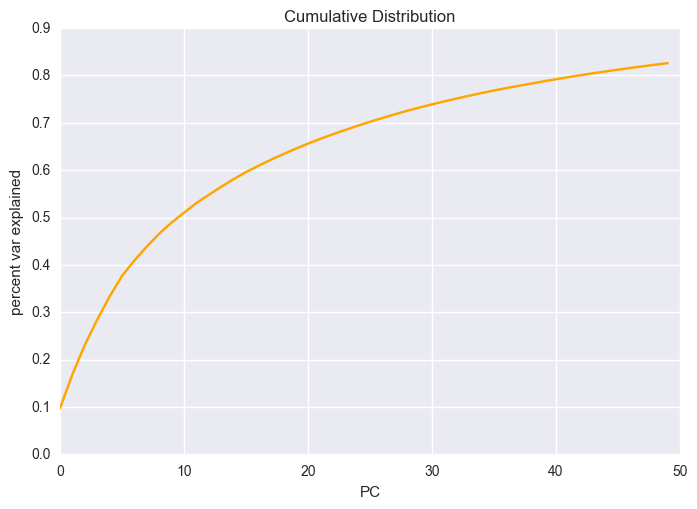

In [28]:
plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

## We will now try to run PCA on the full training and testing sets

In [29]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


Sag Solver...
Fitting Logit...
predicting...
Accuracy is 28.8238095238 %
8 CPUs Ran in 0:00:35.511000 minutes
Confusion matrix, without normalization
[[1793    0   54   24    4   96   41   14    8   21]
 [   0   10    4   41  258   25   10 1438    4  547]
 [  24    9  914   76  274   11  158  333  115  156]
 [  22    5   55  405   67  215   33  591  174  577]
 [   9  299  700  451   47   68   54    9  412   15]
 [  96    7   22  147  156  582   81  212  173  391]
 [  39    0  371    0   58   13 1568   12    4   48]
 [   8  269  237 1301   10   96    7   45  246   10]
 [  29   18  171   70  348   95   32   52  652  587]
 [  17  313  174  507   11  229   22    7  750   37]]
Probabilities [[  2.36410448e-09   5.00137410e-05   6.19943736e-04 ...,   2.09355529e-07
    2.05312726e-04   1.87266624e-05]
 [  2.12017331e-06   4.24889006e-07   6.18451042e-03 ...,   1.05264859e-08
    2.51338606e-01   1.42952495e-06]
 [  9.50407236e-01   2.77207067e-10   4.19700935e-08 ...,   3.87098791e-05
    1.

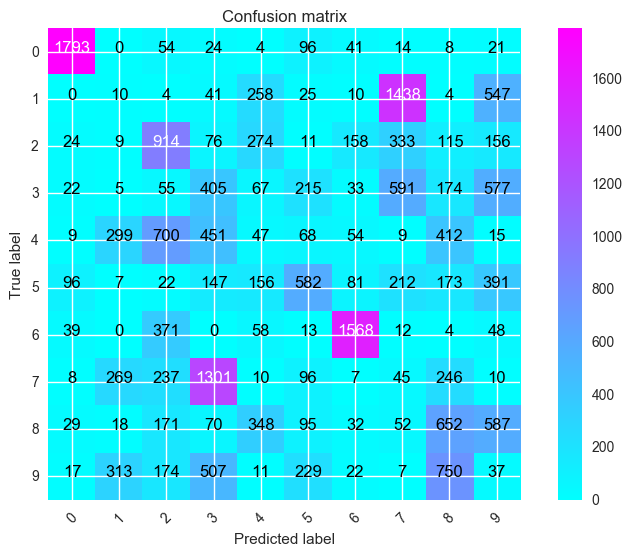

In [32]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
# l2 regulariazation only works with 'multinomial' and solvers: ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


# The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  

lbfgs Solver...
Fitting Logit...
predicting...
Accuracy 28.8571428571 %
CPU Time:  0:00:24.935000
Confusion matrix, without normalization
[[1794    0   55   21    4   95   43   13    8   22]
 [   0   13    4   41  239   23   10 1531    4  472]
 [  27    7  916   77  274   12  160  331  114  152]
 [  25    4   54  392   64  211   33  579  165  617]
 [   9  311  713  448   45   63   63    8  389   15]
 [  93    4   23  149  157  589   80  217  166  389]
 [  43    0  372    0   62   12 1559   12    5   48]
 [   8  250  233 1333   10   98    7   43  239    8]
 [  33   10  170   71  335   96   33   56  669  581]
 [  15  336  174  520   12  218   23    6  723   40]]
Probabilities [[  1.00420314e-10   3.17439910e-06   3.28940255e-04 ...,   3.12524086e-08
    1.06790543e-04   5.37173595e-06]
 [  5.40871706e-07   5.63005196e-07   4.94649717e-03 ...,   7.47369980e-10
    2.34604928e-01   4.13655636e-07]
 [  9.71590987e-01   2.25498197e-13   1.05215828e-08 ...,   5.34998232e-06
    4.50568384e-07

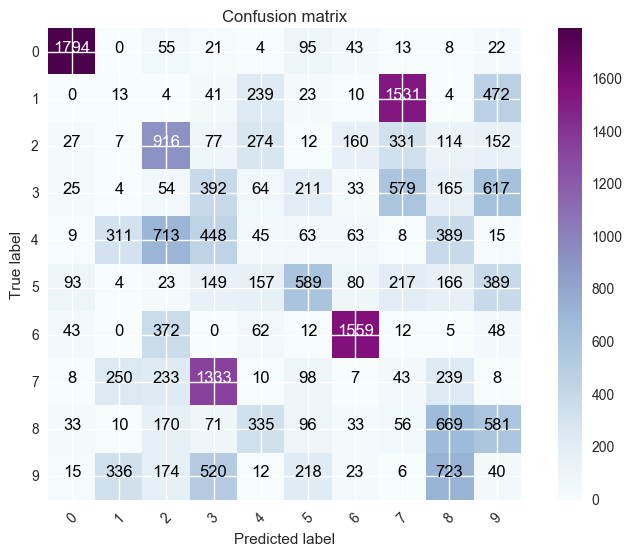

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2',random_state=25,
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels

# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


Done Splitting.


In [34]:
from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

print("Fitting...")
# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

print("done!")


Fitting...
done!


# Try a 3rd Degree polynomial

Training SVM... Predicting...
Accuracy 40.7 %
CPU Time:  0:01:46.187000
Probabilities [[  1.09686386e-05   4.34640479e-05   7.43726788e-05 ...,   5.86457848e-05
    5.39385931e-01   2.06446198e-02]
 [  1.79650329e-07   1.33166904e-06   1.85383656e-03 ...,   1.00837894e-02
    1.00020076e-04   1.06912238e-02]
 [  1.00022170e-09   6.49828611e-10   9.86681025e-09 ...,   2.12080804e-01
    2.99067596e-05   7.87277585e-01]
 ..., 
 [  6.48067647e-03   6.85618358e-05   1.57719995e-05 ...,   3.60933666e-06
    2.95956060e-01   2.72560372e-01]
 [  2.55149121e-05   1.04538442e-09   5.83401659e-04 ...,   5.11298233e-10
    9.58263538e-01   4.11490211e-06]
 [  3.89130636e-06   1.11026258e-02   7.62887436e-03 ...,   1.39703173e-05
    3.86649123e-02   1.56047355e-03]]
Confusion matrix, without normalization
[[1134    5   34   59   31  420   28  102   13  238]
 [   0 1059    0   17  288    7    2   17    8  957]
 [  13   20 1011   32  303   17   23  187  177  349]
 [   1    7    9  787  180   85   1

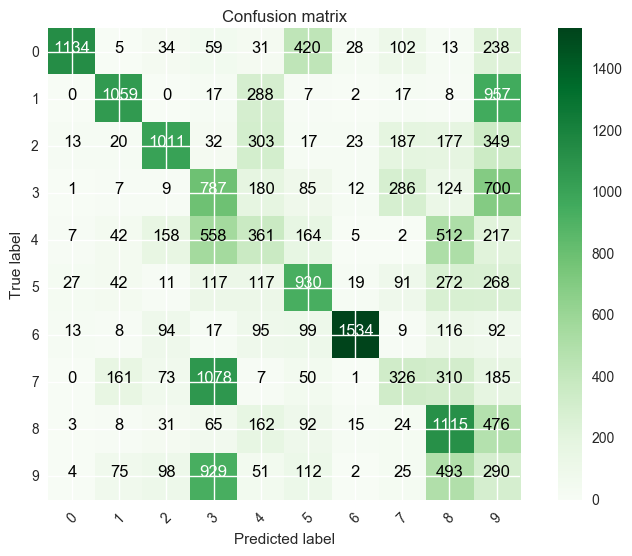

In [35]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


# The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  Edge detection is going to be key for classification

Training SVM... Predicting...
Accuracy 34.7714285714 %
CPU Time:  0:00:51.190000
Probabilities [[  1.10e-05   4.35e-05   7.44e-05 ...,   5.86e-05   5.39e-01   2.06e-02]
 [  1.80e-07   1.33e-06   1.85e-03 ...,   1.01e-02   1.00e-04   1.07e-02]
 [  1.00e-09   6.50e-10   9.87e-09 ...,   2.12e-01   2.99e-05   7.87e-01]
 ..., 
 [  6.48e-03   6.86e-05   1.58e-05 ...,   3.61e-06   2.96e-01   2.73e-01]
 [  2.55e-05   1.05e-09   5.83e-04 ...,   5.11e-10   9.58e-01   4.11e-06]
 [  3.89e-06   1.11e-02   7.63e-03 ...,   1.40e-05   3.87e-02   1.56e-03]]
Confusion matrix, without normalization
[[1655    0  127   47    5  142   14   47    3   24]
 [   0   97    7    8  512    1   12  630   31 1057]
 [  78    5 1224   31  368   17  173  106   43   87]
 [  38    1   45  539  185   80   51  443  106  703]
 [  14  168  629  468  125  268   73    4  262   15]
 [ 124   14   25   89   68  848  143  142  265  176]
 [ 106    0  140   10  103   70 1634    7    3    4]
 [  16  400  300 1056   10  113    5  180 

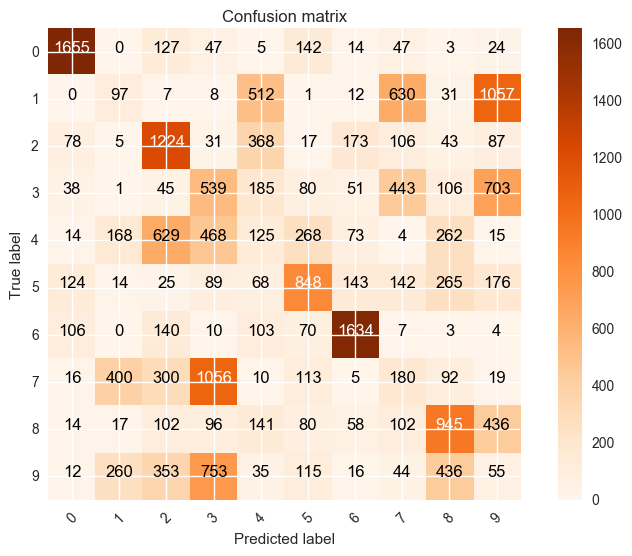

In [36]:
# Linear Kernel with tolerance upped by order of magnitude
start = dt.now()
s = SVC(C=0.5, kernel='linear', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


## simillar issues 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial.  Less fitting and sensitivity as tol and C went down.  

Training SVM... Predicting...
Accuracy 45.1714285714 %
CPU Time:  0:02:42.830000
Probabilities [[  1.10e-05   4.35e-05   7.44e-05 ...,   5.86e-05   5.39e-01   2.06e-02]
 [  1.80e-07   1.33e-06   1.85e-03 ...,   1.01e-02   1.00e-04   1.07e-02]
 [  1.00e-09   6.50e-10   9.87e-09 ...,   2.12e-01   2.99e-05   7.87e-01]
 ..., 
 [  6.48e-03   6.86e-05   1.58e-05 ...,   3.61e-06   2.96e-01   2.73e-01]
 [  2.55e-05   1.05e-09   5.83e-04 ...,   5.11e-10   9.58e-01   4.11e-06]
 [  3.89e-06   1.11e-02   7.63e-03 ...,   1.40e-05   3.87e-02   1.56e-03]]
Confusion matrix, without normalization
[[1599    0   76   37   11  275   13   19    6   28]
 [   0  928    3   30  472    4   12  296   12  598]
 [  24    2 1480   16  184   13   90  105  130   88]
 [  27    1   49  798  222  120   27  328  130  489]
 [   9   24  536  468  255  205   20    0  475   34]
 [  90    2   33  104   50 1083   66   74  282  110]
 [  47    0   96    7   27   71 1793    9   22    5]
 [  24  129  380 1166    8   46    0  193 

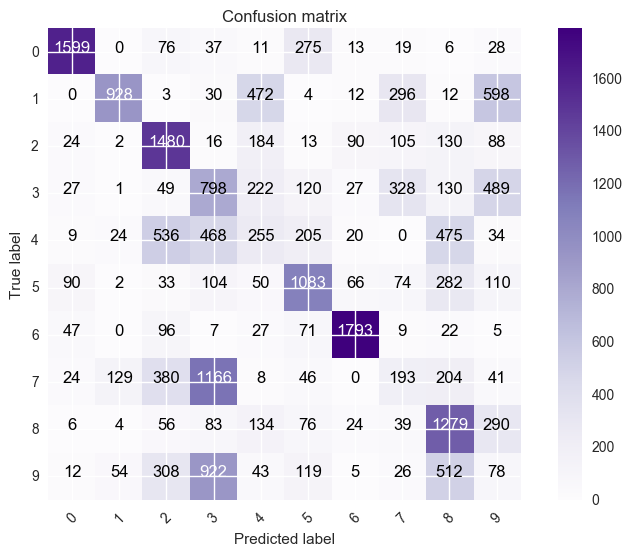

In [37]:
# rbf kernel 
start = dt.now()
s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)



# SVM with the 'rbf' solver outperforms the other solvers, and the logit in this arena due to multidimensional flexibility.


Training SVM... Predicting...
Accuracy 38.2523809524 %
CPU Time:  0:02:45.157000
Probabilities [[  1.10e-05   4.35e-05   7.44e-05 ...,   5.86e-05   5.39e-01   2.06e-02]
 [  1.80e-07   1.33e-06   1.85e-03 ...,   1.01e-02   1.00e-04   1.07e-02]
 [  1.00e-09   6.50e-10   9.87e-09 ...,   2.12e-01   2.99e-05   7.87e-01]
 ..., 
 [  6.48e-03   6.86e-05   1.58e-05 ...,   3.61e-06   2.96e-01   2.73e-01]
 [  2.55e-05   1.05e-09   5.83e-04 ...,   5.11e-10   9.58e-01   4.11e-06]
 [  3.89e-06   1.11e-02   7.63e-03 ...,   1.40e-05   3.87e-02   1.56e-03]]
Confusion matrix, without normalization
[[1676    0   69   61   10  109   19   72    4   44]
 [   0  758   10   10  432    3   15  558    4  565]
 [  69   20 1103   26  302   13  239  155   57  148]
 [  28   24   45  525  263   68   62  517  120  539]
 [  26  194  564  400  184  294   64    3  277   20]
 [ 108  108   29   88   75  911  125  146  219   85]
 [  98    9  128    3   34   77 1689   17    2   20]
 [  50  339  408  953   11   98    0  163 

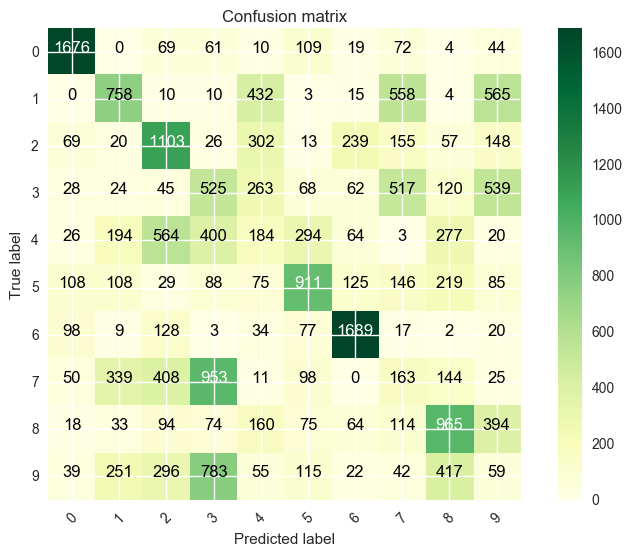

In [38]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

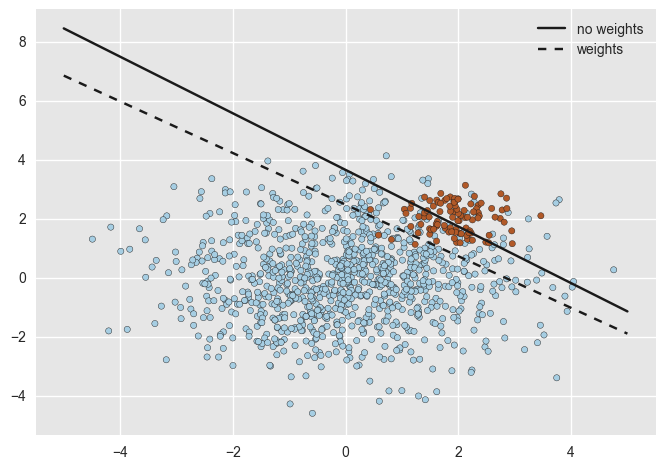

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

# RFB

In [2]:
# Code adapted from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# create the training & test sets, skipping the header row with [1:]
dataset = pd.read_csv("data/train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("data/test.csv").values

# create and train the random forest
# multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
rf.fit(train, target)
pred = rf.predict(test)

np.savetxt('data/submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], 
           delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

print("Benchmark Created!")

 Fitting...
Benchmark Created!


# use training subset set to train then cross validate on testing subset

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = train(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics as mt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  # create x and y training set

start=dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
print 'CPU Time: ', dt.now() - start

splitting...
Fitting...
Accuracy 96.2481962482 %
CPU Time:  0:00:37.104000


## using the random forest benchmark to train, Cross Validate on the original training set 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics as mt
from datetime import datetime as dt

print("Importing...")
predictions = pd.read_csv('data/submission_rand_forest.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

start = dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
rf.fit(test, predictions)

y_hat = rf.predict(train)
print 'Accuracy', mt.accuracy_score(y_hat, train.label)*100, '%'
print 'CPU Time: ', dt.now() - start

Importing...


# Data Preprocessing

In [ ]:
# convert to array, specify data type, and reshape
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)